# FINA

## 0. Previos

Se cargan las bases y las librerías a utilizar.

In [149]:
# Librerías

import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels
from scipy import stats
from pingouin import pairwise_ttests #this is for performing the pairwise tests
import pydotplus

from io import StringIO
from IPython.display import Image, SVG
from graphviz import Source
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.patches import Patch


from scipy.stats import chi2_contingency, norm

from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import StratifiedKFold, train_test_split
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.model_selection import GridSearchCV

from sympy import var, plot_implicit, Eq


#import generic_funcions as gf
#import adherence_functions as af
import warnings
warnings.filterwarnings('ignore')

ruta_archivos = ''

## 1. Variables Dataframe

In [150]:
base = pd.read_csv( ruta_archivos + 'base_adeherencia_features_3.csv', sep='|' )

In [151]:
print(base.shape)

base['adeherencia_12'] = (base['adeherencia_12']/base['cantidad']).apply(lambda x: 1 if x>=0.5 else 0)
#base['adeherencia_12'] = base['adeherencia_12'].apply(lambda x: 1 if x>=1 else x)

ids = ['id','year','month','adeherencia_12']
base.head()

(3717, 142)


,id,year,month,adeherencia_12,cantidad,key,far_rea_asma_sum_6,far_rea_total_sum_6,far_evo_aun_sum_6,far_cau_def_sum_6,...,hab_ejercicio_avg_12,inc_con_sum_6,inc_inc_sum_6,inc_con_sum_12,inc_inc_sum_12,imc_avg_6,imc_avg_12,imc_foto,adh_sum_6,adh_sum_12
0,500547,2016,7,0,1.0,1,NaN,NaN,NaN,NaN,...,NaN,0.0,3.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN
1,500547,2019,3,0,4.0,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,500547,2019,10,0,5.0,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.8,NaN,NaN,0.0
3,500547,2019,12,0,4.0,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.8,NaN,0.0,0.0
4,500547,2020,1,0,3.0,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.8,NaN,0.0,0.0


In [152]:
# Using variables vector of 'Mostrar' analysis.
vec2 = ['bio_benralizumab_avg_12', 'med_num_doses_otra_avg_6','bio_omalizumab_avg_6', 'anf_j_sum_12', 'acd_uso_inhal_avg_12', 'epo_4_sum_6', 'urg_j_total_sum_12', 'cal_psi_avg_12', 'med_num_dis_avg_12', 'far_des_no_flag', 'far_rea_total_sum_6', 'far_cau_def_sum_12', 'inc_inc_sum_12', 'med_flag_j_avg_12', 'adh_sum_6']
vec2

['bio_benralizumab_avg_12',
 'med_num_doses_otra_avg_6',
 'bio_omalizumab_avg_6',
 'anf_j_sum_12',
 'acd_uso_inhal_avg_12',
 'epo_4_sum_6',
 'urg_j_total_sum_12',
 'cal_psi_avg_12',
 'med_num_dis_avg_12',
 'far_des_no_flag',
 'far_rea_total_sum_6',
 'far_cau_def_sum_12',
 'inc_inc_sum_12',
 'med_flag_j_avg_12',
 'adh_sum_6']

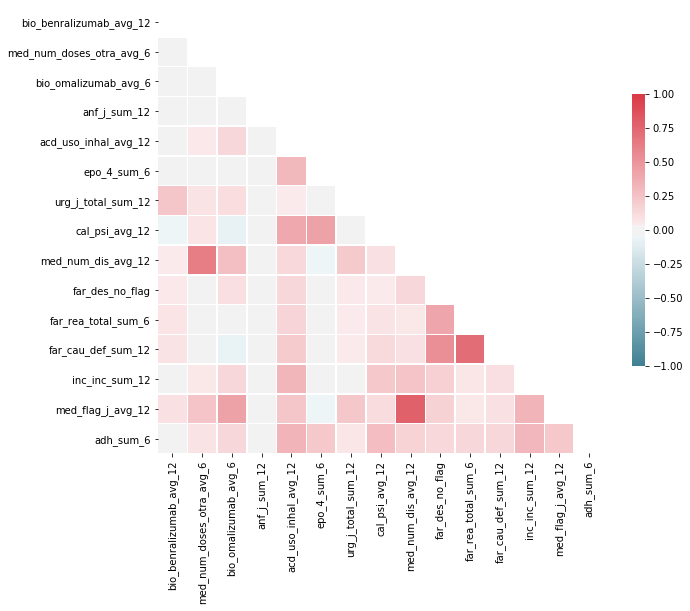

In [153]:
df_correlations = base.fillna(-1)[vec2].corr()

#mask the upper half for visualization purposes
mask = np.zeros_like(df_correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
plt.figure(figsize= (10,10))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_correlations,mask=mask,  vmax=1, vmin=-1, cmap=cmap, 
            center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [154]:
base_nueva = base[ids + vec2] 

In [155]:
base_nueva.fillna(-1,inplace = True)

In [156]:
base_nueva.head()

,id,year,month,adeherencia_12,bio_benralizumab_avg_12,med_num_doses_otra_avg_6,bio_omalizumab_avg_6,anf_j_sum_12,acd_uso_inhal_avg_12,epo_4_sum_6,urg_j_total_sum_12,cal_psi_avg_12,med_num_dis_avg_12,far_des_no_flag,far_rea_total_sum_6,far_cau_def_sum_12,inc_inc_sum_12,med_flag_j_avg_12,adh_sum_6
0,500547,2016,7,0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,3.0,-1.000000,-1.0
1,500547,2019,3,0,-1.0,1021.800000,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,4.444444,-1.0,-1.0,-1.0,-1.0,0.111111,-1.0
2,500547,2019,10,0,-1.0,259.200000,3.0,-1.0,-1.0,-1.0,0.0,-1.0,3.272727,-1.0,-1.0,-1.0,-1.0,0.090909,-1.0
3,500547,2019,12,0,-1.0,596.833333,3.0,-1.0,-1.0,-1.0,0.0,-1.0,3.636364,-1.0,-1.0,-1.0,-1.0,0.090909,0.0
4,500547,2020,1,0,-1.0,732.000000,3.0,-1.0,-1.0,-1.0,0.0,-1.0,3.727273,-1.0,-1.0,-1.0,-1.0,0.000000,0.0


## 2. Datos Basicos

In [157]:
datosbasicos = pd.read_csv( ruta_archivos + 'DatosBasicos.csv', sep='|' )
#datosbasicos.info()
datosbasicos = datosbasicos.dropna()
datosbasicos = datosbasicos.drop_duplicates()

In [158]:
Agregada = base_nueva.merge(datosbasicos, on="id",how ='inner')

In [159]:
# Age using date
Agregada['edad'] = round((Agregada['year'] - Agregada['year_n']) + (Agregada['month'] - Agregada['month_n'])/12,0)

In [160]:
Agregada.drop(columns=['Unnamed: 0', 'fecha_n', 'year_n', 'month_n', 'ciudad', 'departamento'], inplace= True)
Agregada2 = Agregada.copy()

In [161]:
categorias = ['genero', 'escolaridad', 'estadocivil', 'zona', 'nivelsocioeconomico', 'ocupacion',]

In [162]:
for i in categorias:
    Agregada[i] = Agregada[i].astype('category')

In [163]:
df_t=Agregada.copy()
for var in categorias:
    df_t[var]=df_t[var].cat.codes

### make well the categories

- 'genero',
- 'escolaridad', 
- 'estadocivil', 
- 'nivelsocioeconomico', 
- 'zona', 
- 'ocupacion',
'departamento', 'ciudad'

Escolaridad

In [164]:
# How see de cat.code representation:
pd.concat([Agregada['escolaridad'], df_t['escolaridad']], axis=1).drop_duplicates()

,escolaridad,escolaridad
0,SECUNDARIA,4
7,PRIMARIA,3
8,UNIVERSITARIO,7
16,EDAD PREESCOLAR,1
50,TECNICO,5
51,TECNOLOGO,6
341,ANALFABETA,0
2260,POSGRADO,2


In [165]:
Agregada2['escolaridad'].unique()
letras = ['ANALFABETA', 'EDAD PREESCOLAR', 'PRIMARIA', 'SECUNDARIA', 'TECNICO', 'TECNOLOGO', 'UNIVERSITARIO', 'POSGRADO']
valor = [0,1,2,3,4,5,6,7]
Agregada2.replace(letras, valor,inplace = True)

estadocivil

In [166]:
# How see de cat.code representation:
pd.concat([Agregada['estadocivil'], df_t['estadocivil']], axis=1).drop_duplicates()

,estadocivil,estadocivil
0,CASADO (A),0
7,SOLTERO (A),2
53,SEPARADO (A),1
60,UNIÓN LIBRE,3
266,VIUDO (A),4


In [167]:
Agregada2['estadocivil'].unique()
letras = ['SOLTERO (A)', 'UNIÓN LIBRE', 'CASADO (A)', 'SEPARADO (A)', 'VIUDO (A)']
valor = [0,1,2,3,4]
Agregada2.replace(letras, valor,inplace = True)

nivelsocioeconomico

In [168]:
# How see de cat.code representation:
pd.concat([Agregada['nivelsocioeconomico'], df_t['nivelsocioeconomico']], axis=1).drop_duplicates()

,nivelsocioeconomico,nivelsocioeconomico
0,A,0
7,B,1
57,NIVEL 0 DEL SISBEN,3
84,NIVEL 1 DEL SISBEN,4
162,C,2
3421,NIVEL 2 DEL SISBEN,5


In [169]:
Agregada2['nivelsocioeconomico'].unique()
letras = ['NIVEL 0 DEL SISBEN', 'NIVEL 1 DEL SISBEN', 'NIVEL 2 DEL SISBEN', 'A', 'B', 'C']
valor = [0,1,2,3,4,5]
Agregada2.replace(letras, valor,inplace = True)

ocupacion

In [170]:
# How see de cat.code representation:
pd.concat([Agregada['ocupacion'], df_t['ocupacion']], axis=1).drop_duplicates()

,ocupacion,ocupacion
0,EMPLEADO,2
7,ESTUDIANTE,3
8,SIN DEFINIR,7
37,PENSIONADO,6
84,DESEMPLEADO,1
95,AMA DE CASA,0
124,JUBILADO,5
255,INDEPENDIENTE,4


In [171]:
Agregada2['ocupacion'].unique()
letras = ['SIN DEFINIR', 'ESTUDIANTE', 'DESEMPLEADO', 'AMA DE CASA', 'INDEPENDIENTE', 'EMPLEADO', 'JUBILADO', 'PENSIONADO']
valor = [0,1,2,3,4,5,6,7]
Agregada2.replace(letras, valor,inplace = True)

----------------------------------------------------

## 3.0 Classes

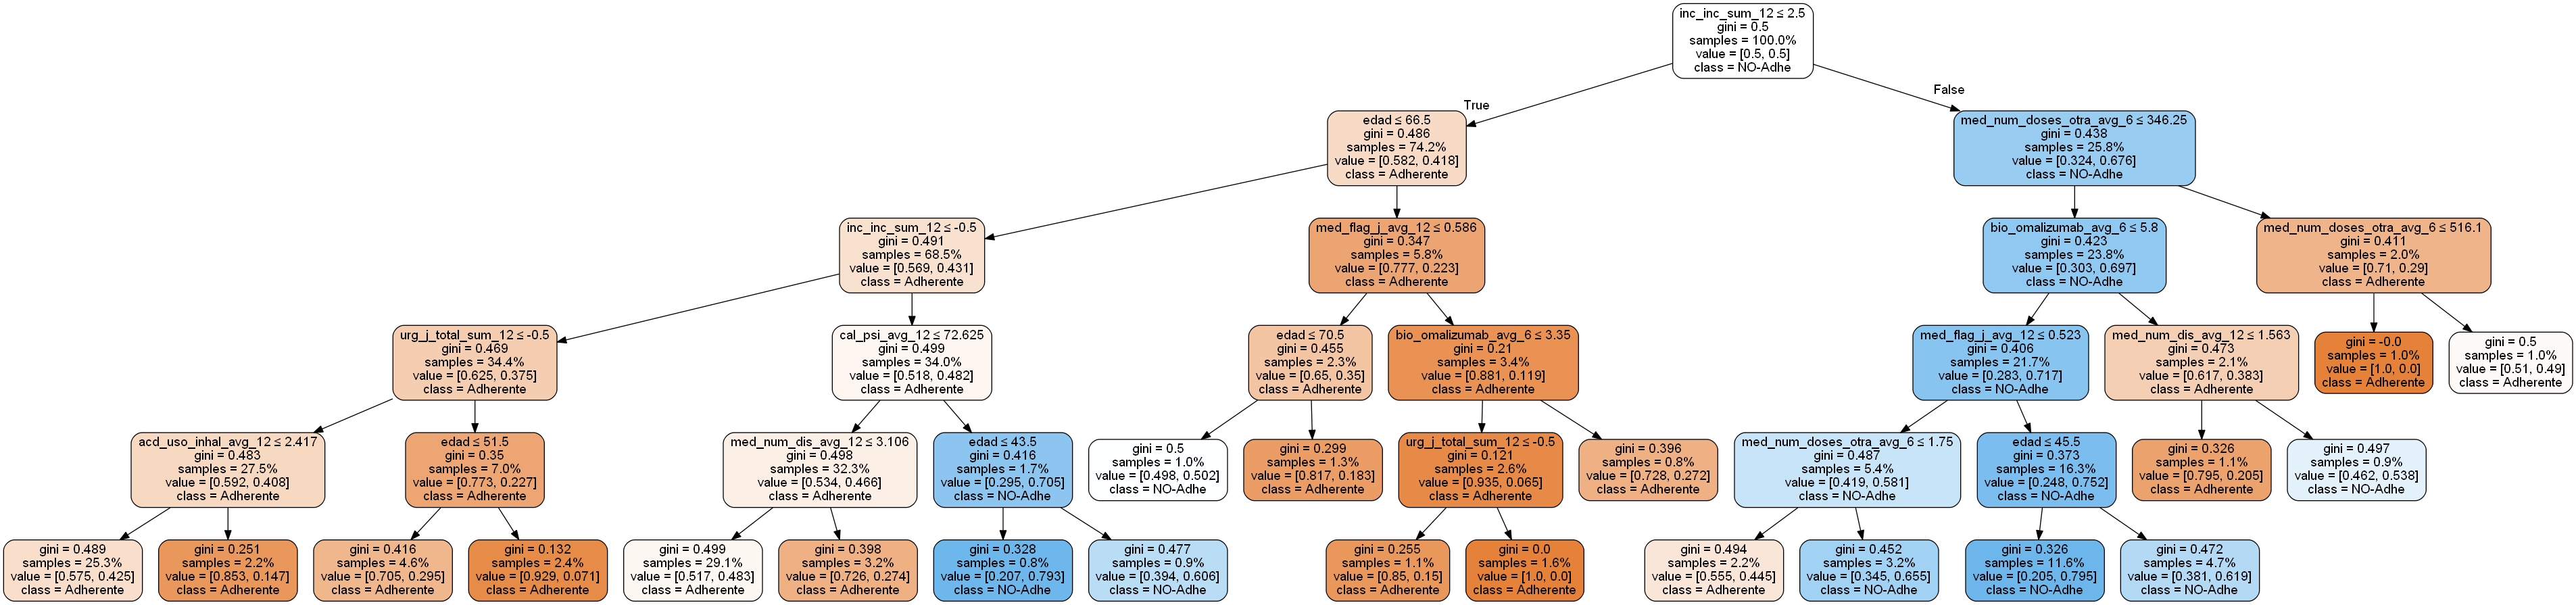

In [172]:
clf = DecisionTreeClassifier(max_depth =5, min_samples_leaf = 30,class_weight='balanced')

# Train Decision Tree Classifer
covariates=df_t.columns[4:]

clf = clf.fit(df_t[covariates], df_t['adeherencia_12'])

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, feature_names = covariates,
                class_names=['Adherente', 'NO-Adhe'],  
                filled=True, rounded=True,
                special_characters=True, 
                impurity='gini', proportion=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## 3.1 Classes

In [173]:
for i in categorias:
    Agregada2[i] = Agregada2[i].astype('category')

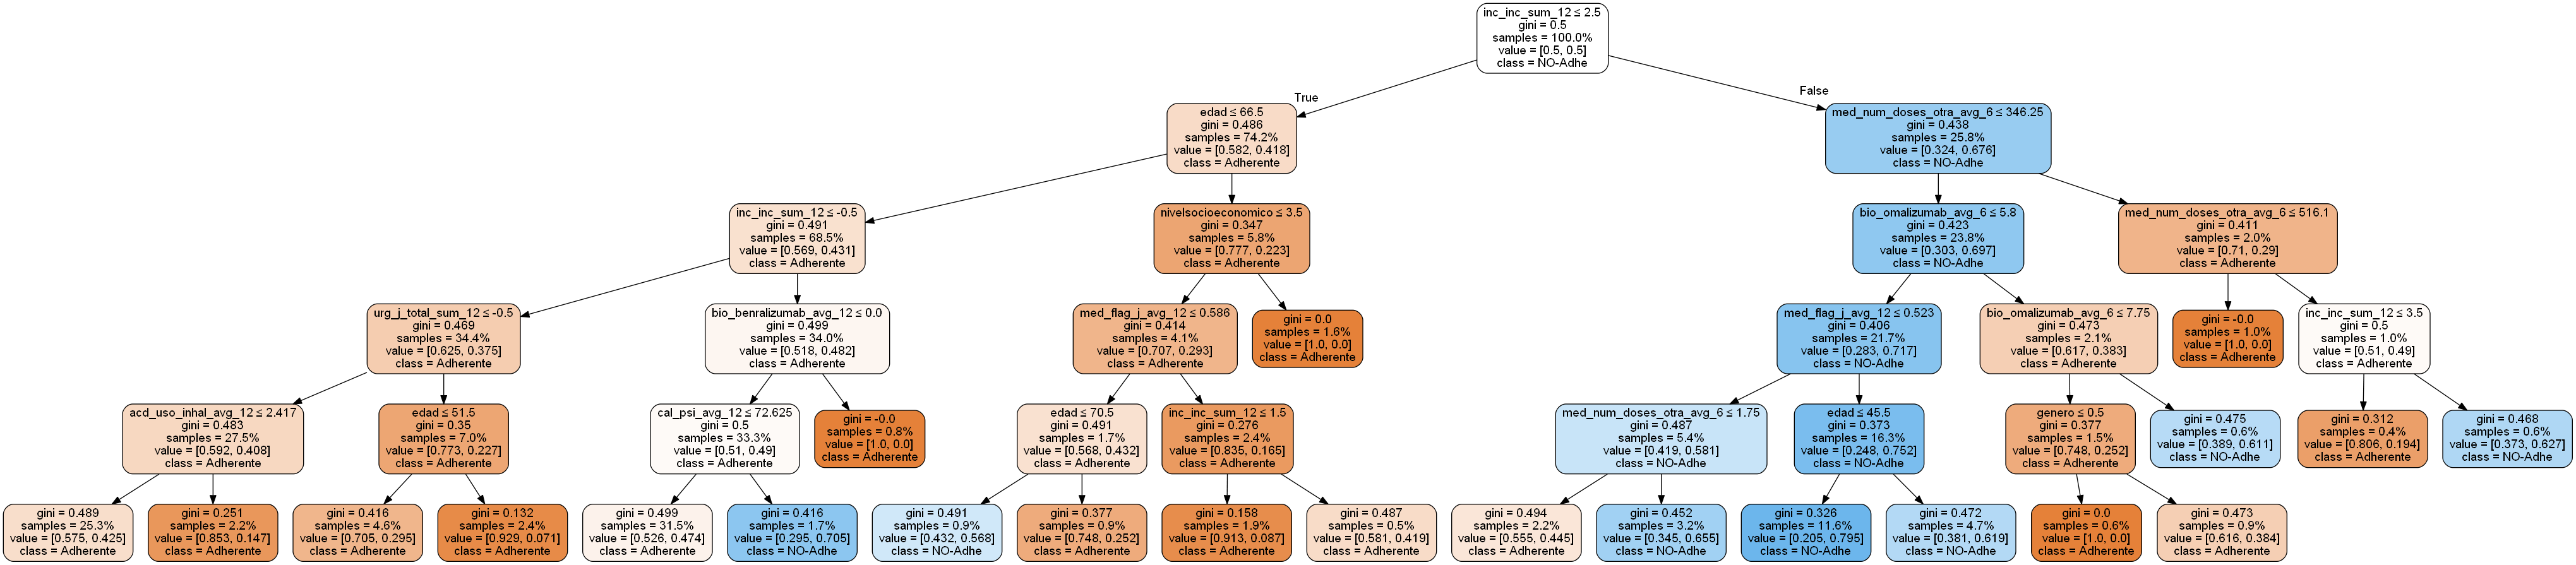

In [174]:
df_t=Agregada2
for var in categorias:
    df_t[var]=df_t[var].cat.codes


clf = DecisionTreeClassifier(max_depth =5, min_samples_leaf = 15,class_weight='balanced')

# Train Decision Tree Classifer
covariates=df_t.columns[4:]

clf = clf.fit(df_t[covariates], df_t['adeherencia_12'])

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, feature_names = covariates,
                class_names=['Adherente', 'NO-Adhe'],  
                filled=True, rounded=True,
                special_characters=True, 
                impurity='gini', proportion=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

----------------------------------------------------

## 3. Modelos

In [175]:
X = df_t[covariates]
y = df_t['adeherencia_12']

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

### Stupid model
each person is adherent 

In [177]:
print('accuracy is: ', round(100*(1-y.sum()/len(y)),2),'%')

accuracy is:  77.07 %


### DecisionTreeRegressor

In [178]:
treereg = DecisionTreeRegressor(max_depth =5, min_samples_leaf = 30)
treereg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=30, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [179]:
yt_pred = np.where(treereg.predict(X_test) >= 0.5, 1, 0)

[[549  18]
 [156  28]]
              precision    recall  f1-score   support

           0       0.78      0.97      0.86       567
           1       0.61      0.15      0.24       184

    accuracy                           0.77       751
   macro avg       0.69      0.56      0.55       751
weighted avg       0.74      0.77      0.71       751



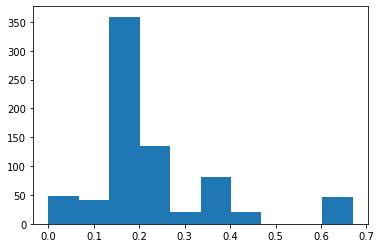

In [180]:
plt.hist(treereg.predict(X_test))
print(confusion_matrix(y_test, yt_pred))
print(classification_report(y_test, yt_pred))

### Logistic Regression

In [181]:
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [182]:
yl_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.67


[[399 168]
 [ 82 102]]
              precision    recall  f1-score   support

           0       0.83      0.70      0.76       567
           1       0.38      0.55      0.45       184

    accuracy                           0.67       751
   macro avg       0.60      0.63      0.61       751
weighted avg       0.72      0.67      0.68       751



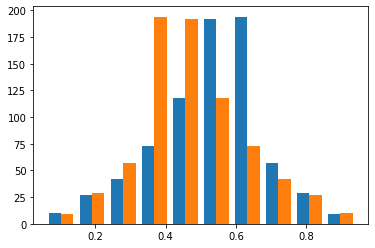

In [183]:
plt.hist(logreg.predict_proba(X_test))
print(confusion_matrix(y_test, yl_pred))
print(classification_report(y_test, yl_pred))

### Random forest

In [184]:
forest = RandomForestClassifier(n_estimators=20, max_depth=2, random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

[[567   0]
 [184   0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       567
           1       0.00      0.00      0.00       184

    accuracy                           0.75       751
   macro avg       0.38      0.50      0.43       751
weighted avg       0.57      0.75      0.65       751



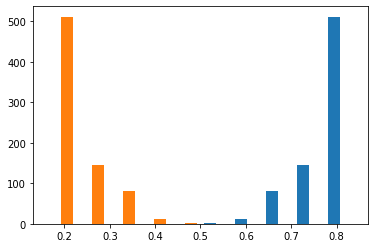

In [185]:
yf_pred = forest.predict(X_test)
plt.hist(forest.predict_proba(X_test))
print(confusion_matrix(y_test, yf_pred))
print(classification_report(y_test, yf_pred))

## 4. Fitting Hyperparameters 

### Random forest

In [186]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [1, 2, 3, 4, 5],
    'min_samples_leaf': [10, 30, 50],
    'n_estimators': [5, 10, 20, 50]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [187]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 165 out of 180 | elapsed:    3.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    3.6s finished


{'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 10, 'n_estimators': 50}

[[445 122]
 [ 94  90]]
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       567
           1       0.42      0.49      0.45       184

    accuracy                           0.71       751
   macro avg       0.63      0.64      0.63       751
weighted avg       0.73      0.71      0.72       751



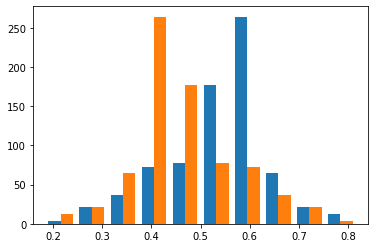

In [188]:
best_grid = grid_search.best_estimator_
y_opt = best_grid.predict(X_test)

plt.hist(best_grid.predict_proba(X_test))

print(confusion_matrix(y_test, y_opt))
print(classification_report(y_test, y_opt))

## 5. Tuning the 50% split 

### Random forest

In [189]:
y_mol = best_grid.predict_proba(X_test)[:,1]

In [190]:
accm = -1
split = 0.5
for i in range(100):
    p = i/100
    y_split = np.where(y_mol >= p, 1, 0)
    if accuracy_score(y_test, y_split)>accm:
        accm = accuracy_score(y_test, y_split)
        split = p
print ('Max accuracy is in split: ',split, 'with acc:',round(accm,2))

Max accuracy is in split:  0.62 with acc: 0.79


### Decision tree Regressor

In [191]:
y_mol = treereg.predict(X_test)

In [192]:
accm = -1
split = 0.5
for i in range(100):
    p = i/100
    y_split = np.where(y_mol >= p, 1, 0)
    if accuracy_score(y_test, y_split)>accm:
        accm = accuracy_score(y_test, y_split)
        split = p
print ('Max accuracy is in split: ',split, 'with acc:',round(accm,2))

Max accuracy is in split:  0.44 with acc: 0.77


### Logistic regresion

In [193]:
y_mol = logreg.predict_proba(X_test)[:,1]

In [194]:
accm = -1
split = 0.5
for i in range(100):
    p = i/100
    y_split = np.where(y_mol >= p, 1, 0)
    if accuracy_score(y_test, y_split)>accm:
        accm = accuracy_score(y_test, y_split)
        split = p
print ('Max accuracy is in split: ',split, 'with acc:',round(accm,2))

Max accuracy is in split:  0.75 with acc: 0.78


## 6. AUC Plot

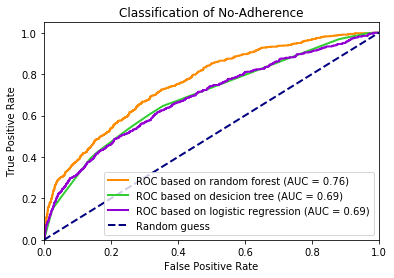

In [195]:
#Next we plot the ROC curve:
roc_rf = metrics.roc_curve(y, best_grid.predict_proba(X)[:,1])
auc_rf = metrics.auc( roc_rf[0], roc_rf[1] )

roc_dt = metrics.roc_curve(y, treereg.predict(X))
auc_dt = metrics.auc( roc_dt[0], roc_dt[1] )

roc_lr = metrics.roc_curve(y, logreg.predict_proba(X)[:,1])
auc_lr = metrics.auc( roc_lr[0], roc_lr[1] )


plt.figure()
line_width = 2
plt.plot(roc_rf[0], roc_rf[1], color='darkorange', lw=line_width,
         label=f"ROC based on random forest (AUC = {auc_rf:0.2f})")

plt.plot(roc_dt[0], roc_dt[1], color='limegreen', lw=line_width,
         label=f"ROC based on desicion tree (AUC = {auc_dt:0.2f})")

plt.plot(roc_lr[0], roc_lr[1], color='darkviolet', lw=line_width,
         label=f"ROC based on logistic regression (AUC = {auc_lr:0.2f})")

plt.plot([0, 1], [0, 1], color='navy', lw=line_width, linestyle='--', label='Random guess')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classification of No-Adherence')
plt.legend(loc='lower right')
plt.show()

------------------------------------------

## 7. Predictions

In [196]:
df_t['reglog'] = logreg.predict_proba(X)[:,1]
df_t['ranfor'] = best_grid.predict_proba(X)[:,1]

In [197]:
df_t['reglog_r'] = round(df_t['reglog'],1)
df_t['ranfor_r'] = round(df_t['ranfor'],1)

In [198]:
df_t[['id','adeherencia_12','reglog','ranfor']]

,id,adeherencia_12,reglog,ranfor
0,500547,0,0.545848,0.486980
1,500547,0,0.104646,0.189648
2,500547,0,0.214549,0.368440
3,500547,0,0.178452,0.253556
4,500547,0,0.149920,0.226554
...,...,...,...,...
3746,1999536,0,0.384580,0.476416
3747,1999536,0,0.452909,0.472066
3748,1999629,0,0.470998,0.465928
3749,1999629,0,0.526865,0.460750


In [199]:
df = df_t[['id','adeherencia_12','ranfor','reglog']].groupby(['adeherencia_12','ranfor','reglog']).count().reset_index()

In [200]:
df.to_csv('adherencia.csv',sep='|')

In [201]:
df

,adeherencia_12,ranfor,reglog,id
0,0,0.178495,0.113108,1
1,0,0.178495,0.115404,1
2,0,0.184130,0.174330,1
3,0,0.185535,0.133093,1
4,0,0.186306,0.133539,1
...,...,...,...,...
3606,1,0.799597,0.890113,1
3607,1,0.801541,0.978336,1
3608,1,0.801578,0.968259,1
3609,1,0.808919,0.949477,1


In [202]:
df.pivot_table(index = 'ranfor',columns = 'reglog',values = 'id').fillna(0)

reglog,0.045220,0.056189,0.064489,0.077937,0.080641,0.086637,0.092838,0.104119,0.104646,0.109334,...,0.961082,0.965869,0.966578,0.967299,0.967659,0.968259,0.973864,0.976626,0.978336,0.979244
ranfor,,,,,,,,,,,,,,,,,,,,,
0.178495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.184130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.185535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.186306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.186935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.801541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
0.801578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0.808919,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [203]:
X.columns

Index(['bio_benralizumab_avg_12', 'med_num_doses_otra_avg_6',
       'bio_omalizumab_avg_6', 'anf_j_sum_12', 'acd_uso_inhal_avg_12',
       'epo_4_sum_6', 'urg_j_total_sum_12', 'cal_psi_avg_12',
       'med_num_dis_avg_12', 'far_des_no_flag', 'far_rea_total_sum_6',
       'far_cau_def_sum_12', 'inc_inc_sum_12', 'med_flag_j_avg_12',
       'adh_sum_6', 'genero', 'escolaridad', 'estadocivil', 'estrato', 'zona',
       'nivelsocioeconomico', 'ocupacion', 'edad'],
      dtype='object')

In [204]:
bio_benralizumab_avg_12=     -1.0
med_num_doses_otra_avg_6=    -1.0
bio_omalizumab_avg_6  =      -1.0
anf_j_sum_12     =           -1.0
acd_uso_inhal_avg_12  =      -1.0
epo_4_sum_6          =       -1.0
urg_j_total_sum_12   =       -1.0
cal_psi_avg_12      =        -1.0
med_num_dis_avg_12   =       -1.0
far_des_no_flag      =       -1.0
far_rea_total_sum_6  =       -1.0
far_cau_def_sum_12   =       -1.0
inc_inc_sum_12      =        -1.0
med_flag_j_avg_12   =        -1.0
adh_sum_6    =               -1.0
genero         =              1.0
escolaridad     =             1.0
estadocivil      =            1.0
estrato          =            1.0
zona             =            1.0
nivelsocioeconomico =         1.0
ocupacion           =         0.0
edad                =        60.0


nuevo = pd.DataFrame([bio_benralizumab_avg_12, med_num_doses_otra_avg_6,
       bio_omalizumab_avg_6, anf_j_sum_12, acd_uso_inhal_avg_12,
       epo_4_sum_6, urg_j_total_sum_12, cal_psi_avg_12,
       med_num_dis_avg_12, far_des_no_flag, far_rea_total_sum_6,
       far_cau_def_sum_12, inc_inc_sum_12, med_flag_j_avg_12,
       adh_sum_6, genero, escolaridad, estadocivil, estrato, zona,
       nivelsocioeconomico, ocupacion, edad]).T

In [205]:
print(logreg.predict_proba(nuevo)[:,1])
print(best_grid.predict_proba(nuevo)[:,1])

[0.32843619]
[0.40149702]


In [206]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

n_digits: 3, 	 n_samples 3751, 	 n_features 2


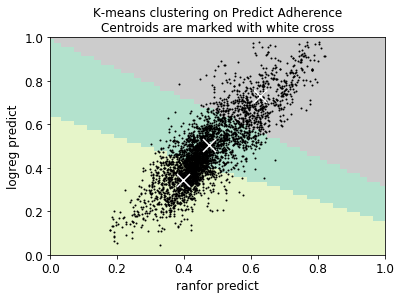

In [207]:
# Add prediction

var = ['ranfor','reglog']

X_digits = df_t[var]

data = X_digits

n_samples, n_features = data.shape
n_digits = 3                                # numero de clases 
#labels = y_digits

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))

# #############################################################################

reduced_data = np.array(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Pastel2,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on Predict Adherence\n'
          'Centroids are marked with white cross')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks(fontsize=12)
plt.xlabel('ranfor predict', fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('logreg predict', fontsize=12)
plt.show()

In [208]:
centroids

array([[0.47519468, 0.50645607],
       [0.39539736, 0.3442451 ],
       [0.62542513, 0.72853232]])

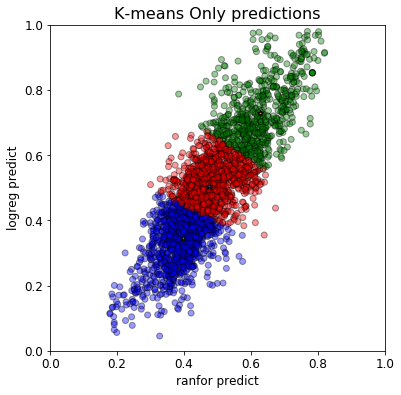

In [209]:
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++')
X_digits = df_t[['ranfor','reglog']]
kmeans.fit(X_digits)

# Iterative procedure to learn labels  
labels = kmeans.predict(X_digits)
centroids = kmeans.cluster_centers_

# Plot the data learned
plt.figure(figsize=(6, 6))

color_map = {1:'r', 2:'g', 3:'b' , 4:'c', 5:'y', 6:'w'}
colors = [color_map[x+1] for x in labels]

plt.scatter(X_digits['ranfor'], X_digits['reglog'], color=colors, alpha=0.4, edgecolor='k')

for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, marker='*', edgecolor='k')

plt.xlim(0., 1.)
plt.xlabel('ranfor predict', fontsize=12)
plt.xticks(fontsize=12)

plt.ylim(0., 1.)
plt.ylabel('logreg predict', fontsize=12)
plt.yticks(fontsize=12)

plt.title('K-means Only predictions', fontsize=16)

plt.show()

In [210]:
pd.Series(labels).value_counts()/len(labels)

2    0.430818
0    0.397494
1    0.171688
dtype: float64

In [211]:
min_e = 10000000000
alp_o = 0
for i in range(101):
    alp = i/100
    y_opt = alp*df_t['ranfor']+(1-alp)*df_t['reglog']
    error = ((df_t['adeherencia_12']-y_opt)**2).sum()
    if error <=min_e:
        min_e = error
        alp_o = alp

print(alp_o)

1.0


In [212]:
centroids

array([[0.4751089 , 0.50653563],
       [0.62534634, 0.72833507],
       [0.39551321, 0.34431349]])

In [213]:
alp_o*centroids[:,1] +(1-alp_o)*centroids[:,1]

array([0.50653563, 0.72833507, 0.34431349])

In [214]:
df_t['predict'] = alp_o*df_t['ranfor']+(1-alp_o)*df_t['reglog']

In [215]:
X_digits = df_t[['ranfor','reglog','predict']]

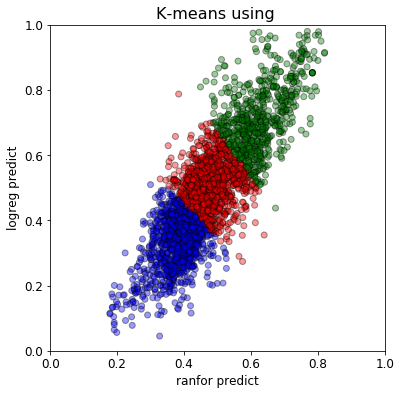

In [216]:
X_digits = df_t[['ranfor','reglog','predict']]
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++')
kmeans.fit(X_digits)

# Iterative procedure to learn labels  
labels = kmeans.predict(X_digits)
centroids = kmeans.cluster_centers_

# Plot the data learned
plt.figure(figsize=(6, 6))

color_map = {1:'r', 2:'g', 3:'b' , 4:'c', 5:'y', 6:'w'}
colors = [color_map[x+1] for x in labels]

plt.scatter(X_digits['ranfor'], X_digits['reglog'], color=colors, alpha=0.4, edgecolor='k')

for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, marker='*', edgecolor='k')

plt.xlim(0., 1.)
plt.xlabel('ranfor predict', fontsize=12)
plt.xticks(fontsize=12)

plt.ylim(0., 1.)
plt.ylabel('logreg predict', fontsize=12)
plt.yticks(fontsize=12)

plt.title('K-means using ', fontsize=16)

plt.show()

In [217]:
centroids

array([[0.47010222, 0.49628159, 0.47010222],
       [0.62500494, 0.71233245, 0.62500494],
       [0.38883203, 0.34114415, 0.38883203]])

In [218]:
print(classification_report(df_t['adeherencia_12'], np.where(df_t['predict'] >= 0.7, 1, 0)))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88      2891
           1       0.81      0.11      0.19       860

    accuracy                           0.79      3751
   macro avg       0.80      0.55      0.53      3751
weighted avg       0.79      0.79      0.72      3751



In [219]:
pd.Series(labels).value_counts()/len(labels)

0    0.411357
2    0.402559
1    0.186084
dtype: float64

### Risk factor explain


In [220]:
best_grid.feature_importances_

array([0.01455732, 0.10208379, 0.0422789 , 0.        , 0.03857268,
       0.00828089, 0.02292112, 0.06405982, 0.07557158, 0.00965636,
       0.00202503, 0.00164391, 0.27606557, 0.05706935, 0.07038452,
       0.00943144, 0.03240091, 0.01611984, 0.02462505, 0.00615412,
       0.00813411, 0.02369186, 0.09427183])

In [221]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, best_grid.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'importance'})
importances.reset_index(inplace = True)
importances = importances[importances['importance'] > 0].sort_values('importance', ascending = False).reset_index(drop = True)
importances

,index,importance
0,inc_inc_sum_12,0.276066
1,med_num_doses_otra_avg_6,0.102084
2,edad,0.094272
3,med_num_dis_avg_12,0.075572
4,adh_sum_6,0.070385
5,cal_psi_avg_12,0.064060
6,med_flag_j_avg_12,0.057069
7,bio_omalizumab_avg_6,0.042279
8,acd_uso_inhal_avg_12,0.038573
9,escolaridad,0.032401


No handles with labels found to put in legend.


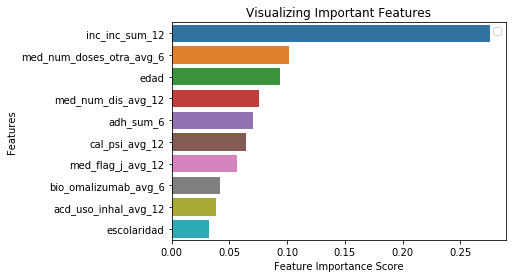

In [222]:
# Creating a bar plot
sns.barplot(x=importances['importance'][:10], y=importances['index'][:10])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [223]:
df_t

,id,year,month,adeherencia_12,bio_benralizumab_avg_12,med_num_doses_otra_avg_6,bio_omalizumab_avg_6,anf_j_sum_12,acd_uso_inhal_avg_12,epo_4_sum_6,...,estrato,zona,nivelsocioeconomico,ocupacion,edad,reglog,ranfor,reglog_r,ranfor_r,predict
0,500547,2016,7,0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,...,3.0,1,3,5,54.0,0.545848,0.486980,0.5,0.5,0.486980
1,500547,2019,3,0,-1.0,1021.800000,-1.0,-1.0,-1.0,-1.0,...,3.0,1,3,5,57.0,0.104646,0.189648,0.1,0.2,0.189648
2,500547,2019,10,0,-1.0,259.200000,3.0,-1.0,-1.0,-1.0,...,3.0,1,3,5,57.0,0.214549,0.368440,0.2,0.4,0.368440
3,500547,2019,12,0,-1.0,596.833333,3.0,-1.0,-1.0,-1.0,...,3.0,1,3,5,58.0,0.178452,0.253556,0.2,0.3,0.253556
4,500547,2020,1,0,-1.0,732.000000,3.0,-1.0,-1.0,-1.0,...,3.0,1,3,5,58.0,0.149920,0.226554,0.1,0.2,0.226554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1999536,2018,8,0,-1.0,2.000000,1.0,-1.0,-1.0,-1.0,...,4.0,1,4,5,27.0,0.384580,0.476416,0.4,0.5,0.476416
3747,1999536,2020,2,0,-1.0,33.400000,1.0,-1.0,-1.0,-1.0,...,4.0,1,4,5,28.0,0.452909,0.472066,0.5,0.5,0.472066
3748,1999629,2018,4,0,-1.0,3.666667,2.0,-1.0,-1.0,-1.0,...,3.0,1,3,1,19.0,0.470998,0.465928,0.5,0.5,0.465928
3749,1999629,2018,5,0,-1.0,3.000000,2.0,-1.0,-1.0,-1.0,...,3.0,1,3,1,20.0,0.526865,0.460750,0.5,0.5,0.460750


In [224]:
final = df_t.groupby(['reglog_r','ranfor_r']).agg(avg=('adeherencia_12', 'mean'), cnt=('adeherencia_12', 'count')).reset_index()

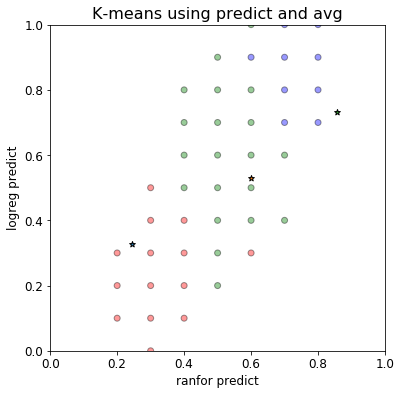

In [225]:
X_digits = final[['reglog_r','ranfor_r','avg']]
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++')
kmeans.fit(X_digits)

# Iterative procedure to learn labels  
labels = kmeans.predict(X_digits)
centroids = kmeans.cluster_centers_

# Plot the data learned
plt.figure(figsize=(6, 6))

color_map = {1:'r', 2:'g', 3:'b' , 4:'c', 5:'y', 6:'w'}
colors = [color_map[x+1] for x in labels]

plt.scatter(X_digits['ranfor_r'], X_digits['reglog_r'], color=colors, alpha=0.4, edgecolor='k')

for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid[:2], marker='*', edgecolor='k')

plt.xlim(0., 1.)
plt.xlabel('ranfor predict', fontsize=12)
plt.xticks(fontsize=12)

plt.ylim(0., 1.)
plt.ylabel('logreg predict', fontsize=12)
plt.yticks(fontsize=12)

plt.title('K-means using predict and avg', fontsize=16)

plt.show()

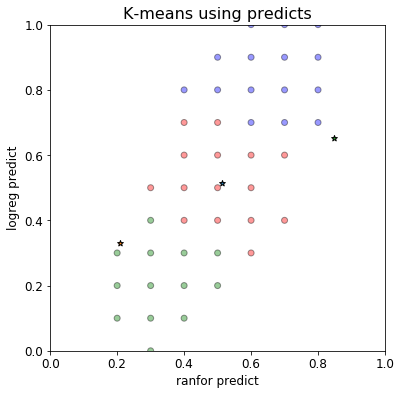

In [226]:
X_digits = final[['reglog_r','ranfor_r']]
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++')
kmeans.fit(X_digits)

# Iterative procedure to learn labels  
labels = kmeans.predict(X_digits)
centroids = kmeans.cluster_centers_

# Plot the data learned
plt.figure(figsize=(6, 6))

color_map = {1:'r', 2:'g', 3:'b' , 4:'c', 5:'y', 6:'w'}
colors = [color_map[x+1] for x in labels]

plt.scatter(X_digits['ranfor_r'], X_digits['reglog_r'], color=colors, alpha=0.4, edgecolor='k')

for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, marker='*', edgecolor='k')

plt.xlim(0., 1.)
plt.xlabel('ranfor predict', fontsize=12)
plt.xticks(fontsize=12)

plt.ylim(0., 1.)
plt.ylabel('logreg predict', fontsize=12)
plt.yticks(fontsize=12)

plt.title('K-means using predicts', fontsize=16)

plt.show()